## Using Keras

In [8]:
# Import semua library yang dibutuh
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame as df
import pandas as pd
from sklearn.model_selection import train_test_split

In [14]:

# Load data sets dari CSV

dataMentah = pd.read_csv("Data/heart_disease_uci.csv")

dataMentah.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [19]:
print('Data Types')
print('-'*10)
print(dataMentah.dtypes)
print("")
dataMentah.shape

Data Types
----------
id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object



(920, 16)

In [22]:
dataClear = dataMentah.dropna()
dataClear.shape

(299, 16)

In [25]:
thalUnique = dataClear['thal'].unique()
print(thalUnique)
dataClear.thal.replace(thalUnique,[0,1,2], inplace=True)

[0 1 2]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_27948\2283767216.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataClear.thal.replace(thalUnique,[0,1,2], inplace=True)


In [27]:
dataClear.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,0,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,1,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,2,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,1,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,1,0


In [31]:
X = dataClear[['age', 'chol', 'thalch','ca','thal']]
Y = dataClear.num

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [43]:
df(x_train)

,age,chol,thalch,ca,thal
94,63,252.0,172.0,0.0,1
93,44,141.0,175.0,0.0,1
47,50,243.0,128.0,0.0,2
157,58,300.0,171.0,2.0,2
83,68,274.0,150.0,0.0,2
...,...,...,...,...,...
58,54,273.0,152.0,1.0,1
88,53,234.0,160.0,0.0,1
200,50,254.0,159.0,0.0,1
176,52,233.0,147.0,3.0,2


In [44]:
df(y_train)

,num
94,0
93,0
47,4
157,1
83,3
...,...
58,0
88,0
200,0
176,0


In [40]:
y_train.shape

(239,)

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Inisiasi Multilinear Regression

# independentValue = df[x]
# depenendentValue = df[y]
model = LinearRegression()
model.fit(x_train, y_train)

# # Prediksi nilai
y_pred = model.predict(x_test)


pd.DataFrame(y_pred)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 1.1441726549715532
R-squared: 0.3036311820967723


In [57]:
y_pred

array([ 1.33812172, -0.84707685, -0.01416554,  0.65547385,  0.03105987,
        0.31660373,  0.97318775,  0.68021831,  2.19433145,  2.32126224,
        0.59731108,  1.28320164,  0.57882461,  2.16558077,  0.80218188,
        2.77277901,  1.42617628,  0.79082484,  0.65554338,  0.92984809,
        0.92749449,  1.07390594,  0.25628583,  2.10609705,  0.69501143,
        0.44623309,  1.28618579,  1.68080215,  0.67548378,  1.79071728,
        2.07204826,  1.57603657,  1.42946593,  0.22060578,  1.44829273,
        0.43670621,  2.6111088 ,  1.98984768,  1.75905496,  1.15583674,
        0.6402418 ,  2.08565859,  2.62944394, -0.07061172,  2.85685394,
        2.58776488,  0.34693093,  0.23554794,  2.78873597,  2.40928727,
        1.10401264,  0.60486718,  1.35452272,  0.2794794 ,  0.01120481,
        1.65341084,  2.74985809,  0.34424234,  0.04475645,  0.58649748])

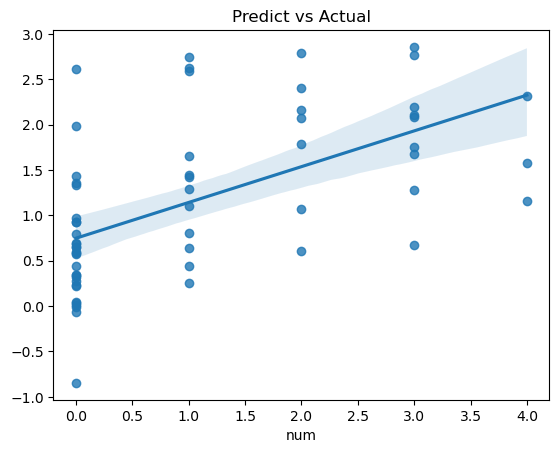

In [84]:
# sns.title("Datanyata dengan Prediksi")
# help(sns)

sns.regplot(x = y_test, y = y_pred).set_title('Predict vs Actual')
plt.show()
# print(x_test.shape)
# print(y_pred.shape)